## 导入相关的包

In [2]:
import pandas as pd
import numpy as np

## 读入数据集

- 查看样本数量和特征数量
- 检查读入数据的基本结构

In [43]:
data = pd.read_csv("data/train_new.csv")

In [44]:
data.shape

(50000, 74)

打印前五行数据查看

In [45]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


查看列信息

In [46]:
columns_info=pd.read_csv("data/feature_x.csv",index_col=0)

In [47]:
data=data.rename(columns={k:v for k, v in zip(columns_info["output_feat"],columns_info["description"])})

In [48]:
data.head()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


## 观察数据
- 数据缺失情况
- 特征之间、特征与Label的相关度等

In [14]:
missing_values_count = data.isnull().sum()

In [15]:
missing_values_count[0:10]

手机号归属地         5851
籍贯              390
与黑名单用户联系次数      817
近六个月通话次数       4280
近六个月搜索次数       8891
近六个月借款机构统计     3461
安装应用平均值        4825
履约次数统计        48466
借款次数统计         4280
用户行为分值          955
dtype: int64

In [55]:
co=data.corr()
co["abs"]=abs(co["Y"])
new_co = co.sort_values(by=['abs'],ascending=False)
new_co["Y"][0:20]

Y                 1.000000
最近14天机构联系计数      -0.244145
手机账户余额           -0.164431
上个月语音套餐总容量       -0.151542
最近七天风险机构计数       -0.146208
手机记录天数            0.145208
联系人中黑名单人数计数       0.141244
近30天历史搜索数量       -0.140307
第三方风险分数          -0.128984
平均充值金额           -0.119884
网龄               -0.114756
最近3个月活跃天数        -0.114321
近6个平均期限          -0.113517
过去12个月被叫次数均值     -0.111530
近三个月平台借贷详情       -0.111350
当前话费余额           -0.102974
过去12个月话费均值       -0.096947
过去12个月语音套餐容量均值    0.093385
最近90天搜索数量         0.079281
过去12个月平均主叫比例     -0.078752
Name: Y, dtype: float64

## 处理缺失数据
每种处理方式新建一个cell
### 默认值填充
缺失值填充为-1

In [17]:
data.fillna(-1, inplace=True)

In [18]:
data.head()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,-1.0,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,-1.0,10000.0,0.0,-1.0,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,-1.0,-1.0,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,-1.0,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,-1.0,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,-1.0,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


将-1替换为nan

In [19]:
data.replace(to_replace=-1, value=np.NaN, inplace=True)

In [20]:
data.head()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


### 平均值填充
对于某些数值属性可以使用平均值填充，如“近六个月搜索次数”

In [21]:
data.近六个月搜索次数.fillna(data.近六个月搜索次数.mean(), inplace=True)

In [22]:
data.head()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
0,9.0,1458.0,17147.0,10.0,0.000000e+00,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,4.235226e+08,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.000000e+00,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.000000e+00,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.000000e+00,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


重新加载data

In [26]:
data = pd.read_csv("data/train_new.csv")

### 删除不完整的行
删除任何包含空值的行，可以发现删除的数据太多了，丢失大量有价值的数据

In [27]:
data.dropna(inplace=True)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
33,2.0,668.0,113.0,7.0,1048576.0,20000.0,0.0,3145728.0,2.0,11900.0,...,110.0,281.0,18.0,49.0,447.0,6.0,1597992.0,381525.0,0,33
170,6.0,2089.0,684.0,4.0,614400.0,5000.0,0.0,11400.0,0.0,3000.0,...,173.0,866.0,114.0,100.0,1092.0,6.0,0.0,614400.0,0,170
573,6.0,1309.0,31.0,11.0,5345280.0,10000.0,0.0,30000.0,4.0,14060.0,...,352.0,855.0,5.0,62.0,882.0,6.0,337356.0,2655573.0,1,573
663,2.0,146.0,187.0,1.0,3072.0,3000.0,0.0,700.0,0.0,25900.0,...,146.0,656.0,187.0,61.0,31.0,6.0,3072.0,3072.0,1,663
3879,1.0,485.0,29.0,2.0,1830635.0,5000.0,0.0,30000.0,1.0,17165.0,...,52.0,247.0,9.0,134.0,44.0,6.0,2281123.0,1266909.0,1,3879


删除所有值都为空的行，第二行虽然空值很多但是并没有被删掉，删除效率太低

In [28]:
data = pd.read_csv("data/train_new.csv")
data.dropna(how='all', inplace=True)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


只保留至少有五个非空值的行

In [30]:
data = pd.read_csv("data/train_new.csv")
data.dropna(thresh=5, inplace=True)
missing_values_count = data.isnull().sum()
missing_values_count[0:10]

X1      5851
X2       390
X3       817
X4      4280
X5      8891
X6      3461
X7      4825
X8     48466
X9      4280
X10      955
dtype: int64

去掉label为空的行

In [34]:
data = pd.read_csv("data/train_new.csv")
data.dropna(subset=['Y'], inplace=True)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


## 数据变换与离散化

### 1. 缩放(Scaling)
找到所有数值属性，使用最大最小值规范，可以看到数据范围缩放到适合观察和处理的大小，而数据间大小关系没有改变

In [35]:
data = pd.read_csv("data/train_new.csv")
numeric_feats = data.dtypes[data.dtypes != "object"].index
data[numeric_feats] = data[numeric_feats].apply(lambda x: (x - x.min()) / (x.max() -
x.min()))
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,0.818182,0.094984,0.145874,0.163934,0.0,0.008626,0.0,NaN,0.00,0.002204,...,0.003107,0.427520,0.125006,0.013330,0.022994,0.250000,0.0,0.0,1.0,0.00000
1,0.181818,0.016287,0.000323,0.098361,NaN,0.009481,0.0,NaN,0.04,0.003510,...,0.015536,0.585725,0.000357,0.017486,0.018746,0.208333,NaN,NaN,1.0,0.00002
2,0.181818,0.068664,0.001514,0.016393,0.0,0.008644,0.0,NaN,0.04,0.004117,...,0.118591,0.538631,0.001480,0.011180,0.000462,0.250000,0.0,0.0,0.0,0.00004
3,0.909091,0.091075,0.005776,0.114754,0.0,0.009481,0.0,NaN,0.04,0.004148,...,0.005179,0.026490,0.005768,0.011753,0.001616,0.250000,0.0,0.0,1.0,0.00006
4,0.181818,0.071336,0.002595,0.180328,0.0,0.009481,0.0,NaN,0.08,0.003873,...,0.047644,0.290655,0.002552,0.006880,0.022671,0.208333,0.0,0.0,0.0,0.00008


### 2. 规范化(Normalization)
零均值规范化，与scaling相比，不仅仅改变了数据范围，也平移数据使得均值为0，更靠近标准正态分布

In [37]:
data = pd.read_csv("data/train_new.csv")
data[numeric_feats] = data[numeric_feats].apply(lambda x: (x - x.mean()) / (x.std()))
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,1.029154,0.538781,5.607751,-0.070962,-0.020829,-0.103187,-0.095701,NaN,-0.798870,-0.253708,...,-0.910740,0.440512,4.743993,0.234886,-0.210486,0.349606,-0.070304,-0.017537,1.276128,-1.731999
1,-1.044798,-1.042146,-0.473350,-0.569373,NaN,0.062788,-0.095701,NaN,-0.404132,0.016640,...,-0.726820,1.218165,-0.475500,0.741694,-0.281526,-0.833314,NaN,NaN,1.276128,-1.731930
2,-1.044798,0.010060,-0.423590,-1.192385,-0.020829,-0.099579,-0.095701,NaN,-0.404132,0.142251,...,0.798183,0.986677,-0.428477,-0.027256,-0.587309,0.349606,-0.070304,-0.017537,-0.783605,-1.731860
3,1.325433,0.460258,-0.245518,-0.444770,-0.020829,0.062788,-0.095701,NaN,-0.404132,0.148839,...,-0.880087,-1.530746,-0.248937,0.042648,-0.568004,0.349606,-0.070304,-0.017537,1.276128,-1.731791
4,-1.044798,0.063717,-0.378450,0.053640,-0.020829,0.062788,-0.095701,NaN,-0.009394,0.091743,...,-0.251693,-0.232248,-0.383592,-0.551540,-0.215891,-0.833314,-0.070304,-0.017537,-0.783605,-1.731722


### 3. 离散化(Discretization)
#### 等深分箱
每箱的记录数相同（称为深度）

In [38]:
data.X65_bin = pd.qcut(data.X65, q=10, duplicates='drop')
print(data.X65_bin)

0        (-0.958, -0.872]
1        (-0.757, -0.627]
2          (0.561, 1.243]
3        (-0.958, -0.872]
4        (-0.29, -0.0831]
               ...       
49995      (0.561, 1.243]
49996    (-0.0831, 0.185]
49997    (-0.0831, 0.185]
49998    (-0.958, -0.872]
49999    (-0.872, -0.757]
Name: X65, Length: 50000, dtype: category
Categories (10, interval[float64]): [(-0.958, -0.872] < (-0.872, -0.757] < (-0.757, -0.627] < (-0.627, -0.474] ... (-0.0831, 0.185] < (0.185, 0.561] < (0.561, 1.243] < (1.243, 13.841]]


d:\python3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


#### 等宽分箱
按区间范围分箱，范围称为宽度

In [7]:
data = pd.read_csv("data/train_new.csv")
data.dropna(thresh=60, inplace=True)
del data["X8"]
del data["X23"]
del data["X26"]
del data["X39"]
del data["X49"]
data=data.fillna(data.mean())
data.X66 = pd.cut(data.X66, bins=10,labels=False)
print(data.X66)

0        4
2        5
3        0
4        2
5        5
        ..
49993    5
49994    3
49996    5
49998    6
49999    3
Name: X66, Length: 39277, dtype: int64


##### 计算WOE与IV值

In [53]:
def compute_WOE_IV(df,col,target):
    total = df.groupby([col])[target].count() 
    total = pd.DataFrame({'total': total})
    
    bad   = df.groupby([col])[target].sum() 
    bad   = pd.DataFrame({'bad': bad})
    
    regroup = total.merge(bad,left_index=True,right_index=True,how='left')
    regroup.reset_index(level=0,inplace=True)
    
    N = sum(regroup['total'])
    B = sum(regroup['bad']) 
    
    regroup['good'] = regroup['total'] - regroup['bad'] 
    G = N - B
    
    regroup['bad_pcnt'] = regroup['bad'].map(lambda x: x*1.0/B)
    regroup['good_pcnt'] = regroup['good'].map(lambda x: x * 1.0 / G)
    
    regroup["WOE"] = regroup.apply(lambda x:np.log(x.good_pcnt*1.0/x.bad_pcnt),axis=1)
    
    WOE_dict = regroup[[col,"WOE"]].set_index(col).to_dict(orient="index")
    IV = regroup.apply(lambda x:(x.good_pcnt-x.bad_pcnt)*np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    
    IV = sum(IV)
    
    return {"WOE":WOE_dict,"IV":IV}

data.X1 = pd.qcut(data.X1, q=10, duplicates='drop',labels=False)
compute_WOE_IV(data,"X1","Y")

{'WOE': {0: {'WOE': 0.022573224270878694},
  1: {'WOE': 0.0025825444249026404},
  2: {'WOE': -0.02927426182330609},
  3: {'WOE': 0.01415343696480574},
  4: {'WOE': -0.48336513374703355},
  5: {'WOE': 0.05961544698774813},
  6: {'WOE': 0.058109272858663456},
  7: {'WOE': 0.029331530886904204},
  8: {'WOE': 0.05002912989672128},
  9: {'WOE': 0.0601939908694925}},
 'IV': 0.013771755829089658}

## 特征构造(交叉)
说明源特征、交叉方式等

In [44]:
def add_cross_feature(data, feature_1, feature_2):
    comb_index = data[[feature_1, feature_2]].drop_duplicates()
    comb_index[feature_1 + '_' + feature_2] = np.arange(comb_index.shape[0])
    data = pd.merge(data, comb_index, 'left', on=[feature_1, feature_2])
    return data
data=add_cross_feature(data,'X1','X2')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X67,X68,X69,X70,X71,X72,Y,id,X1_X2_x,X1_X2_y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,2449.0,93.0,498.0,6.0,0.0,0.0,1,0,0,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,7.0,122.0,406.0,5.0,NaN,NaN,1,1,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,29.0,78.0,10.0,6.0,0.0,0.0,0,2,2,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,113.0,82.0,35.0,6.0,0.0,0.0,1,3,3,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,50.0,48.0,491.0,5.0,0.0,0.0,0,4,4,4


## 为实验六处理的数据

In [61]:
data = pd.read_csv("data/train_new.csv")
data.dropna(thresh=60, inplace=True)
del data["X8"]
del data["X23"]
del data["X26"]
del data["X39"]
del data["X49"]

In [62]:
data=data.fillna(data.mean())
numeric_feats = data.dtypes[data.dtypes != "object"].index
# data[numeric_feats] = data[numeric_feats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [63]:
print(numeric_feats)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X24', 'X25', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X36', 'X37', 'X38', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45',
       'X46', 'X47', 'X48', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56',
       'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66',
       'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'Y', 'id'],
      dtype='object')


In [64]:
dict={}
for feature in numeric_feats:
    if feature=="Y":
     break
    data[feature] = pd.qcut(data[feature], q=10, duplicates='drop',labels=False)
    dict[feature]=compute_WOE_IV(data,feature,"Y")["IV"]
print(dict)

{'X1': 0.013771755829089658, 'X2': 0.022097407478334018, 'X3': 0.010923412477982251, 'X4': 0.039496456926515794, 'X5': 0.0034854545735585733, 'X6': 0.019701224567730446, 'X7': 0.0, 'X9': 0.014199197475939621, 'X10': 0.00454512400693414, 'X11': 0.001920228681018894, 'X12': 0.011888593558792003, 'X13': 0.12844641412519675, 'X14': 0.08221841428151419, 'X15': 0.043848540062307845, 'X16': 0.14059085007271366, 'X17': 0.006647233010955245, 'X18': 0.0057688323575665786, 'X19': 0.04249550766091478, 'X20': 0.005359250057140821, 'X21': 0.10974816763533304, 'X22': 0.1138670999807553, 'X24': 0.10044946965273224, 'X25': 0.1009451024673527, 'X27': 0.22262734968882983, 'X28': 0.08751868558929563, 'X29': 0.039861543275643035, 'X30': 0.14530559527801068, 'X31': 0.005731828814701264, 'X32': 0.025584376184321023, 'X33': 0.053915914561446676, 'X34': 0.1341196547650473, 'X35': 0.0031475059471249914, 'X36': 0.005731828814701264, 'X37': 0.02520468307166039, 'X38': 0.056391164812644445, 'X40': 0.00406275795557

In [69]:
d_order=sorted(dict.items(),key=lambda x:x[1],reverse=True)
print(d_order)

[('X27', 0.22262734968882983), ('X30', 0.14530559527801068), ('X16', 0.14059085007271366), ('X34', 0.1341196547650473), ('X13', 0.12844641412519675), ('X22', 0.1138670999807553), ('X21', 0.10974816763533304), ('X25', 0.1009451024673527), ('X24', 0.10044946965273224), ('X42', 0.09984444992390279), ('X28', 0.08751868558929563), ('X69', 0.0829985215848746), ('X14', 0.08221841428151419), ('X63', 0.06602138876138744), ('X41', 0.05918187620807001), ('X38', 0.056391164812644445), ('X33', 0.053915914561446676), ('X58', 0.047504888558689215), ('X66', 0.04500398609940674), ('X15', 0.043848540062307845), ('X19', 0.04249550766091478), ('X29', 0.039861543275643035), ('X4', 0.039496456926515794), ('X65', 0.03700539074895667), ('X46', 0.03402201329385302), ('X57', 0.03205757829680487), ('X52', 0.03204396111101626), ('X32', 0.025584376184321023), ('X37', 0.02520468307166039), ('X61', 0.024203873613382953), ('X2', 0.022097407478334018), ('X45', 0.02037026614991279), ('X6', 0.019701224567730446), ('X9',

In [72]:
bar=[]
label=[]
for i in range(20):
    bar.append(d_order[i][1])
    label.append(d_order[i][0])
print(bar)
print(label)

[0.22262734968882983, 0.14530559527801068, 0.14059085007271366, 0.1341196547650473, 0.12844641412519675, 0.1138670999807553, 0.10974816763533304, 0.1009451024673527, 0.10044946965273224, 0.09984444992390279, 0.08751868558929563, 0.0829985215848746, 0.08221841428151419, 0.06602138876138744, 0.05918187620807001, 0.056391164812644445, 0.053915914561446676, 0.047504888558689215, 0.04500398609940674, 0.043848540062307845]
['X27', 'X30', 'X16', 'X34', 'X13', 'X22', 'X21', 'X25', 'X24', 'X42', 'X28', 'X69', 'X14', 'X63', 'X41', 'X38', 'X33', 'X58', 'X66', 'X15']


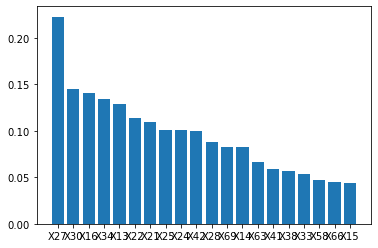

In [75]:
import matplotlib.pyplot as plt

plt.bar(range(20), bar, align='center')
plt.xticks(range(20), label)
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [38]:
n=data.shape[0]
train=data[0:int(n*0.95)]
test=data[int(n*0.95):n]
train.to_csv("./train.csv",index=False)
test.to_csv("./test.csv",index=False)

In [41]:
data = pd.read_csv("data/test_new.csv")
del data["X8"]
del data["X23"]
del data["X26"]
del data["X39"]
del data["X49"]

In [42]:
data=data.fillna(data.mean())
numeric_feats = data.dtypes[data.dtypes != "object"].index
data[numeric_feats] = data[numeric_feats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data.to_csv("./final_test.csv",index=False)